Basic Imports

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utm
import folium
from folium.plugins import HeatMap
from shapely.geometry import Point

Retrieving and Checking Data:

In [3]:
data0 = pd.read_csv('dados/china/LC lavas - Xerxes.csv')

df = pd.DataFrame(data0)

df.head()

,Sample,mE,mN,Rock,Class,Unit,Box,Row,SiO2,Al2O3,...,TmN,YbN,LuN,Eu/Eu,LaN/YbN,LaN/SmN,CeN/YbN,CeN/SmN,EuN/YbN,REE
0,18LYS-7071A,702967,4547695,Basalt,Low Fe,LC,5,44.0,60.90,10.83,...,18.53,18.53,17.06,0.70,1.87,1.20,1.91,1.23,1.01,199.20
1,19LYS-8117,688664,4539503,Basalt,Low Fe,LC,3,46.0,60.21,14.57,...,28.24,30.95,27.94,0.56,1.48,1.25,1.54,1.31,0.64,270.80
2,18LYS-7071B,702967,4547695,Basalt,Low Ti,LC,5,45.0,51.96,13.82,...,24.41,25.51,24.12,0.76,1.67,1.10,1.73,1.14,1.07,256.90
3,19LYS-7290,716810,4550864,Diabase,Low Ti,LC,3,20.0,52.76,14.09,...,19.56,20.32,18.53,0.72,1.45,0.95,1.57,1.03,1.02,195.36
4,18LYS-7067,702689,4548560,Basalt,High Ti,LC,5,43.0,51.29,12.46,...,16.62,17.35,15.74,0.78,1.25,0.92,1.38,1.01,1.07,154.67


The coordinates provided are in UTM. Most packages only use geographical coordinates, so we must convert those using the utm package (https://anaconda.org/conda-forge/utm).

In [4]:
coord_list = list(utm.to_latlon(df['mE'], df['mN'], 46, 'U'))

lat = coord_list[0]

lon = coord_list[1]

df.insert(3, 'Latitude', lat, False)
df.insert(4, 'Longitude', lon, False)

In [5]:
df.head()

,Sample,mE,mN,Latitude,Longitude,Rock,Class,Unit,Box,Row,...,TmN,YbN,LuN,Eu/Eu,LaN/YbN,LaN/SmN,CeN/YbN,CeN/SmN,EuN/YbN,REE
0,18LYS-7071A,702967,4547695,41.055196,95.415273,Basalt,Low Fe,LC,5,44.0,...,18.53,18.53,17.06,0.70,1.87,1.20,1.91,1.23,1.01,199.20
1,19LYS-8117,688664,4539503,40.984898,95.242696,Basalt,Low Fe,LC,3,46.0,...,28.24,30.95,27.94,0.56,1.48,1.25,1.54,1.31,0.64,270.80
2,18LYS-7071B,702967,4547695,41.055196,95.415273,Basalt,Low Ti,LC,5,45.0,...,24.41,25.51,24.12,0.76,1.67,1.10,1.73,1.14,1.07,256.90
3,19LYS-7290,716810,4550864,41.080145,95.580964,Diabase,Low Ti,LC,3,20.0,...,19.56,20.32,18.53,0.72,1.45,0.95,1.57,1.03,1.02,195.36
4,18LYS-7067,702689,4548560,41.063051,95.412253,Basalt,High Ti,LC,5,43.0,...,16.62,17.35,15.74,0.78,1.25,0.92,1.38,1.01,1.07,154.67


In [6]:
df['geometry'] = None

for index, row in df.iterrows():
    df.loc[index, 'geometry'] = Point(row.Longitude, row.Latitude)

In [7]:
df.head()

,Sample,mE,mN,Latitude,Longitude,Rock,Class,Unit,Box,Row,...,YbN,LuN,Eu/Eu,LaN/YbN,LaN/SmN,CeN/YbN,CeN/SmN,EuN/YbN,REE,geometry
0,18LYS-7071A,702967,4547695,41.055196,95.415273,Basalt,Low Fe,LC,5,44.0,...,18.53,17.06,0.70,1.87,1.20,1.91,1.23,1.01,199.20,POINT (95.41527329920774 41.05519615425123)
1,19LYS-8117,688664,4539503,40.984898,95.242696,Basalt,Low Fe,LC,3,46.0,...,30.95,27.94,0.56,1.48,1.25,1.54,1.31,0.64,270.80,POINT (95.24269557175144 40.98489844741234)
2,18LYS-7071B,702967,4547695,41.055196,95.415273,Basalt,Low Ti,LC,5,45.0,...,25.51,24.12,0.76,1.67,1.10,1.73,1.14,1.07,256.90,POINT (95.41527329920774 41.05519615425123)
3,19LYS-7290,716810,4550864,41.080145,95.580964,Diabase,Low Ti,LC,3,20.0,...,20.32,18.53,0.72,1.45,0.95,1.57,1.03,1.02,195.36,POINT (95.5809637358981 41.08014506435875)
4,18LYS-7067,702689,4548560,41.063051,95.412253,Basalt,High Ti,LC,5,43.0,...,17.35,15.74,0.78,1.25,0.92,1.38,1.01,1.07,154.67,POINT (95.41225253019762 41.06305054807226)


In [8]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [9]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

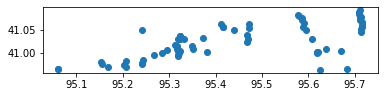

In [10]:
gdf.plot()

In [11]:
filename = 'dados/china/stanford-bw669kf8724-geojson.json'

china = gpd.read_file(filename)

china.crs = {'datum': 'WGS84', 'ellps': 'WGS84', 'proj': 'longlat', 'no_defs': True}

china.crs

<Geographic 2D CRS: +proj=longlat +datum=WGS84 +ellps=WGS84 +no_defs + ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [89]:
china

,id,id_0,iso,name_0,id_1,name_1,hasc_1,ccn_1,cca_1,type_1,engtype_1,nl_name_1,varname_1,geometry
0,bw669kf8724.1,49,CHN,China,1,Anhui,CN.AH,0,None,Shěng,Province,安徽|安徽,Ānhuī,"MULTIPOLYGON (((116.42632 34.63999, 116.42606 ..."
1,bw669kf8724.2,49,CHN,China,2,Beijing,CN.BJ,0,None,Zhíxiáshì,Municipality,北京|北京,Běijīng,"MULTIPOLYGON (((116.66689 40.97671, 116.66867 ..."
2,bw669kf8724.3,49,CHN,China,3,Chongqing,CN.CQ,0,None,Zhíxiáshì,Municipality,重慶|重庆,Chóngqìng,"MULTIPOLYGON (((108.54189 32.18967, 108.54713 ..."
3,bw669kf8724.4,49,CHN,China,4,Fujian,CN.FJ,0,None,Shěng,Province,福建,Fújiàn,"MULTIPOLYGON (((117.68903 23.53347, 117.68903 ..."
4,bw669kf8724.5,49,CHN,China,5,Gansu,CN.GS,0,None,Shěng,Province,甘肅|甘肃,Gānsù,"MULTIPOLYGON (((97.18472 42.77169, 97.39468 42..."
5,bw669kf8724.6,49,CHN,China,6,Guangdong,CN.GD,0,None,Shěng,Province,廣東|广东,Guǎngdōng,"MULTIPOLYGON (((110.11819 20.23680, 110.11819 ..."
6,bw669kf8724.7,49,CHN,China,7,Guangxi,CN.GX,0,None,Zìzhìqu,Autonomous Region,廣西壯族自治區|广西壮族自治区,Guǎngxī Zhuàngzú,"MULTIPOLYGON (((109.20570 20.91847, 109.20570 ..."
7,bw669kf8724.8,49,CHN,China,8,Guizhou,CN.GZ,0,None,Shěng,Province,貴州|贵州,Gùizhōu,"MULTIPOLYGON (((109.55132 26.72297, 109.54439 ..."
8,bw669kf8724.9,49,CHN,China,9,Hainan,CN.HA,0,None,Shěng,Province,海南,Hǎinán,"MULTIPOLYGON (((109.67653 18.18708, 109.67653 ..."
9,bw669kf8724.10,49,CHN,China,10,Hebei,CN.HB,0,None,Shěng,Province,河北,Héběi,"MULTIPOLYGON (((118.56236 38.97625, 118.56236 ..."


In [12]:
# gansu_province = china['Gansu']

In [13]:
for_map = df

hmap = folium.Map(location=[41.055196, 95.415273], zoom_start=10, )

hm_wide = HeatMap((for_map[['Latitude','Longitude','Zr']].values),
                  min_opacity=0.2, radius=17, blur=15, max_zoom=1)


hmap.add_child(hm_wide)